训练集Train:训练模型

验证集Validation:选择模型，模型的最终优化

测试集Test:测试模型泛化能力

偏差Bias:预测值和真实值的差距表示算法的拟合能力

方差Variance:预测值的变化范围表示数据扰动产生的影响

高偏差--欠拟合

高方差--过拟合

#### 正则化
正则化是一种通过引入额外约束或惩罚项来防止模型过拟合、提升泛化能力的技术。其核心思想是在模型训练目标中加入与模型复杂度相关的正则化项，迫使模型参数趋近于零或降低参数间的相关性，从而避免模型对训练数据的噪声和细节过度拟合。常见的正则化方法包括L1正则化（通过L1范数惩罚参数绝对值之和，导致参数稀疏化）、L2正则化（通过L2范数惩罚参数平方和，使参数值整体减小）、弹性网络（结合L1和L2的优点）、Dropout（随机忽略部分神经元以模拟集成学习效果）、数据增强（扩展训练数据多样性）、早停（提前终止训练以避免过拟合）以及最大范数约束等。正则化通过调整模型的偏差-方差权衡，在保持模型对数据拟合能力的同时，增强其对未见过数据的预测准确性。

#### 1.L1正则化
核心思路：在损失函数里加入权重参数绝对值的总和，以此对模型进行约束。

数学形式：
假设原损失函数为$L(θ)$

正则化后的损失函数则为：
$$L^′(θ)=L(θ)+λ\sum_{i=1}^{n}∣θ_i∣$$
这里的 (λ) 是正则化参数，用于控制惩罚的力度。
作用原理：
当权重(θ_i) 的绝对值较大时，会受到更严厉的惩罚。
会使部分权重变为0，进而实现特征选择的效果，最终得到一个稀疏模型。
适用情形：
当数据集中存在冗余特征，或者我们希望自动筛选出重要特征时，L1正则化是个不错的选择。
像文本分类、基因数据分析这类高维数据场景，L1正则化能发挥很好的作用。

#### 2. L2正则化（岭回归）
核心思路：在损失函数中添加权重参数平方的总和，以此来约束模型。

数学形式：原损失函数为$L(θ)$，

正则化后的损失函数为：
$$L^′(θ)=L(θ)+λ\sum_{i=1}^{n}θ_i^2$$
 
其中的(λ)同样是正则化参数。

作用原理：
对较大的权重进行惩罚，不过不会让权重变为0，而是使权重趋近于0。
让模型参数分布更加平滑，防止模型出现过拟合。

适用情形：
当我们希望保留所有特征，并且避免出现系数估计值过大的情况时，L2正则化较为合适。
例如在房价预测、金融风控等回归问题中，L2正则化能有效发挥作用。

* L1正则化：假设模型中有1000个特征，经过L1正则化后，可能只有50个特征的权重不为0，其余特征会被过滤掉。

* L2正则化：会使所有特征的权重都变小，但不会完全为0，例如原本较大的权重可能会从100降低到0.1。

#### Dropout正则化
Dropout在训练时以概率p随机“关闭”神经元，形成多个子网络，测试时通过缩放（1-p）补偿随机性。

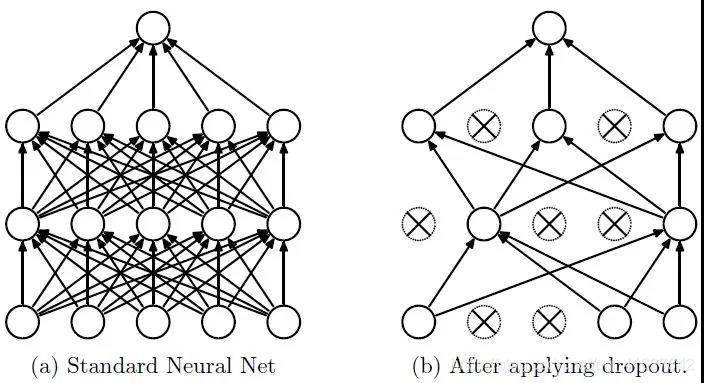

* 首先随机（临时）删掉网络中一半的隐藏神经元，输入输出神经元保持不变（图3中虚线为部分临时被删除的神经元）
* 然后把输入x通过修改后的网络前向传播，然后把得到的损失结果通过修改的网络反向传播。一小批训练样本执行完这个过程后，在没有被删除的神经元上按照随机梯度下降法更新对应的参数（w，b）。
* 然后继续重复这一过程（1和2）：
恢复被删掉的神经元（此时被删除的神经元保持原样，而没有被删除的神经元已经有所更新）。